# Tagging Pipeline - A DataFrames NLP API

The `tagging_utils.tagging_utils` api pipeline is essentially a decorator framework built on top of `transformers.pipelines` from hugging face. The additional functionality added in `tagging_utils` allows the user to process a dataframe containing columns of text data.

In [1]:
import os
os.chdir('..')
from rsutils import tagging_utils as tu
os.chdir('notebooks')
import pandas as pd

## Sample Data 1 - Reddit Submissions

In [2]:
data = pd.read_csv('../submissions_stream.csv')
data.head()

,author,comments,clicked,created_utc,distinguished,edited,id,is_original_content,is_self,link_flair_text,...,over_18,permalink,score,selftext,spoiler,stickied,subreddit,title,upvote_ratio,url
0,ryzu99,<praw.models.comment_forest.CommentForest obje...,False,1.596393e+09,NaN,False,i2gxgm,False,True,NaN,...,False,/r/investing/comments/i2gxgm/portfolio_proposa...,0,Hi guys! I’ve been tinkering around with a the...,False,False,investing,Portfolio Proposal (TechHeavy),0.50,https://www.reddit.com/r/investing/comments/i2...
1,djporter91,<praw.models.comment_forest.CommentForest obje...,False,1.596395e+09,NaN,False,i2hpdk,False,True,NaN,...,False,/r/investing/comments/i2hpdk/hedging_in_anothe...,1,I hold a long portfolio of monthly income stoc...,False,False,investing,Hedging in another brokerage account,0.56,https://www.reddit.com/r/investing/comments/i2...
2,hhh888hhhh,<praw.models.comment_forest.CommentForest obje...,False,1.596396e+09,NaN,1596397045.0,i2hszf,False,True,NaN,...,False,/r/investing/comments/i2hszf/2023_option_leaps...,9,\r\nIn anticipation of the new LEAPS to come o...,False,False,investing,2023 option LEAPS will be introduced on Monday...,0.71,https://www.reddit.com/r/investing/comments/i2...
3,Theonlyeasyday,<praw.models.comment_forest.CommentForest obje...,False,1.596396e+09,NaN,False,i2hyab,False,True,NaN,...,False,/r/investing/comments/i2hyab/why_dont_more_peo...,2,What am I missing with my thinking? What risks...,False,False,investing,Why don't more people talk about fixed income?,0.58,https://www.reddit.com/r/investing/comments/i2...
4,wesley_iles,<praw.models.comment_forest.CommentForest obje...,False,1.596397e+09,NaN,False,i2ia4h,False,True,NaN,...,False,/r/investing/comments/i2ia4h/curious_about_eve...,1,Hey investing!\r\n\r\nI know no one can predic...,False,False,investing,Curious about everyone’s educated guesses on t...,0.57,https://www.reddit.com/r/investing/comments/i2...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   author               103 non-null    object 
 1   comments             103 non-null    object 
 2   clicked              103 non-null    bool   
 3   created_utc          103 non-null    float64
 4   distinguished        2 non-null      object 
 5   edited               103 non-null    object 
 6   id                   103 non-null    object 
 7   is_original_content  103 non-null    bool   
 8   is_self              103 non-null    bool   
 9   link_flair_text      0 non-null      float64
 10  locked               103 non-null    bool   
 11  name                 103 non-null    object 
 12  num_comments         103 non-null    int64  
 13  over_18              103 non-null    bool   
 14  permalink            103 non-null    object 
 15  score                103 non-null    int

<AxesSubplot:ylabel='Frequency'>

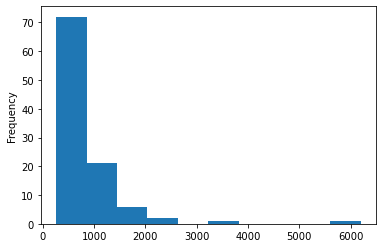

In [4]:
data['selftext'].str.len().plot.hist()

Some of the very large texts had to be clipped due to limited number of tokens. In future I hope to add an ability to dynamically chunk the text to produce chunked results.

In [5]:
data['selftext'] = data['selftext'].str.slice(0, 1500)

## Sentiment Analysis Pipeline

In [6]:
sentiment_pipe = tu.tagging_pipline('sentiment-analysis')  # ..., model, config, tokenizer, framework, **kwargs)
sentiment_pipe.model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
       

In [7]:
sentiment_tags = sentiment_pipe(data, 'title')  # ..., tag_suffix: Optional[str], file: Optional[str], *args, **kwargs)
sentiment_tags['title_sentiment']

0      [{'label': 'POSITIVE', 'score': 0.950352609157...
1      [{'label': 'NEGATIVE', 'score': 0.998081564903...
2      [{'label': 'POSITIVE', 'score': 0.904251337051...
3      [{'label': 'NEGATIVE', 'score': 0.973215699195...
4      [{'label': 'POSITIVE', 'score': 0.995581626892...
                             ...                        
98     [{'label': 'NEGATIVE', 'score': 0.988896012306...
99     [{'label': 'POSITIVE', 'score': 0.522240579128...
100    [{'label': 'NEGATIVE', 'score': 0.975818634033...
101    [{'label': 'NEGATIVE', 'score': 0.997027337551...
102    [{'label': 'NEGATIVE', 'score': 0.884564101696...
Name: title_sentiment, Length: 103, dtype: object

In [8]:
many_sentiment_tags = sentiment_pipe(data, ['title', 'selftext'])
many_sentiment_tags[['title', 'selftext', 'title_sentiment', 'selftext_sentiment']]

,title,selftext,title_sentiment,selftext_sentiment
0,Portfolio Proposal (TechHeavy),Hi guys! I’ve been tinkering around with a the...,"[{'label': 'POSITIVE', 'score': 0.950352609157...","[{'label': 'NEGATIVE', 'score': 0.995231330394..."
1,Hedging in another brokerage account,I hold a long portfolio of monthly income stoc...,"[{'label': 'NEGATIVE', 'score': 0.998081564903...","[{'label': 'NEGATIVE', 'score': 0.996959269046..."
2,2023 option LEAPS will be introduced on Monday...,\r\nIn anticipation of the new LEAPS to come o...,"[{'label': 'POSITIVE', 'score': 0.904251337051...","[{'label': 'NEGATIVE', 'score': 0.998279809951..."
3,Why don't more people talk about fixed income?,What am I missing with my thinking? What risks...,"[{'label': 'NEGATIVE', 'score': 0.973215699195...","[{'label': 'NEGATIVE', 'score': 0.996721267700..."
4,Curious about everyone’s educated guesses on t...,Hey investing!\r\n\r\nI know no one can predic...,"[{'label': 'POSITIVE', 'score': 0.995581626892...","[{'label': 'POSITIVE', 'score': 0.982766568660..."
...,...,...,...,...
98,Kodak Loan Disclosure and Stock Surge Under SE...,https://www.wsj.com/articles/kodak-loan-disclo...,"[{'label': 'NEGATIVE', 'score': 0.988896012306...","[{'label': 'NEGATIVE', 'score': 0.992655336856..."
99,Conservative alternatives to high-yield savings,As much as I want to like the low interest rat...,"[{'label': 'POSITIVE', 'score': 0.522240579128...","[{'label': 'NEGATIVE', 'score': 0.988303661346..."
100,Wkhs dd,\r\n- They are first and only ev company that ...,"[{'label': 'NEGATIVE', 'score': 0.975818634033...","[{'label': 'NEGATIVE', 'score': 0.931227922439..."
101,what happens to emerging market ETFs when a co...,The title pretty much says it all... my though...,"[{'label': 'NEGATIVE', 'score': 0.997027337551...","[{'label': 'NEGATIVE', 'score': 0.998926699161..."


In [9]:
ner_pipeline = tu.tagging_pipline('ner')
ner_pipeline.model

BertForTokenClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 1024, padding_idx=0)
      (position_embeddings): Embedding(512, 1024)
      (token_type_embeddings): Embedding(2, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm): LayerNorm((1024,), eps=1e-1

## Sample Data 2 - Reddit Comments

In [10]:
data = pd.read_csv('../comments_stream.csv')

In [11]:
ner_tags = ner_pipeline(data, 'body')
ner_tags[['body', 'body_nertag']]

,body,body_nertag
0,Beautiful country with a lot of history. My vi...,[]
1,Your submission was removed because it is a sh...,[]
2,"Wow that reminds me of the time i wired $71,00...",[]
3,You need to start writing reviews for them the...,"[{'word': 'Omaha', 'score': 0.997726559638977,..."
4,"**Hi, welcome to /r/investing. Please note tha...","[{'word': 'Red', 'score': 0.6318739056587219, ..."
...,...,...
108,If anything Walmart will be the next Amazon. K...,"[{'word': 'W', 'score': 0.9910761713981628, 'e..."
109,"Kroger’s pickup experience is so shit-tastic, ...","[{'word': 'K', 'score': 0.9994198083877563, 'e..."
110,Nooo they're all going to laugh at you,[]
111,The jewelry is basically purchased as a store ...,[]


In [12]:
featextr_pipe = tu.tagging_pipline('feature-extraction')
featextr_pipe.model

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(28996, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0): TransformerBlock(
        (attention): MultiHeadSelfAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Linear(i

In [13]:
extraction_tags = featextr_pipe(data, 'body')
extraction_tags[['body', 'body_extracted']]

,body,body_extracted
0,Beautiful country with a lot of history. My vi...,"[[[0.3953604996204376, 0.10346171259880066, -0..."
1,Your submission was removed because it is a sh...,"[[[0.5442933440208435, -0.03753986209630966, -..."
2,"Wow that reminds me of the time i wired $71,00...","[[[0.3470192849636078, 0.1690899133682251, -0...."
3,You need to start writing reviews for them the...,"[[[0.42953211069107056, 0.08393619954586029, -..."
4,"**Hi, welcome to /r/investing. Please note tha...","[[[0.45317259430885315, -0.03377668932080269, ..."
...,...,...
108,If anything Walmart will be the next Amazon. K...,"[[[0.4139106273651123, 0.24311253428459167, -0..."
109,"Kroger’s pickup experience is so shit-tastic, ...","[[[0.513343870639801, 0.08413420617580414, 0.0..."
110,Nooo they're all going to laugh at you,"[[[0.2973708212375641, 0.1228756457567215, -0...."
111,The jewelry is basically purchased as a store ...,"[[[0.3005811274051666, 0.0022675860673189163, ..."


# Not Shown

* question-answering
* fill-mask
* summarization
* translation_en_to_fr
* translation_en_to_de
* translation_en_to_ro
* text-generation